# Przygotowanie innowacyjnych materiałów szkoleniowych i dokumentacji wewnętrznych w obszarze IT

## 4. Jupyter - kalkulator symboliczny: zadanie "Pudełko Pad Thai"
### <i>Bartosz Naskręcki</i>

W tym pliku rozważymy zadanie z geometrii, którego rozwiązanie może być w całości wykonane z wykorzystaniem możliwości symbolicznych pakietu SymPy. Wszystkie obliczenia będą wykonane w rachunku symbolicznym, co powoduje, że nasze wyniki nie są przybliżeniami i wszelkie uzyskane formuły są udowodnione w sposób algebraiczny.

## Zadanie:

Rozważamy pudełko, którego ściany są pięciokątami foremnymi o długości boku 1. Podstawa pudełka jest kwadratem o boku 1. Zakładając, że ściany pudełka stykają się, oblicz jaka jest odległość pomiędzy górnymi wierzchołkami ścian pudełka leżących naprzeciw siebie.

<img src="pad_thai.png"></img>

Wykonujemy import z biblioteki SymPy. W przypadku komunikatu o błędzie importu, należy zainstalować bibliotekę w lokalnej instancji Pythona.

In [93]:
from sympy import *

Biblioteka [SymPy](https://www.sympy.org) posiada wbudowane możliwości rachunków symbolicznych na zmiennych oraz obsługę funkcji matematycznych wraz z relacjami pomiędzy nimi. Konstruując rozwiązanie naszego zadania zapoznamy się z szeregiem standardowych funkcjonalności. Rozszerzone możliwości tej biblioteki są wbudowane w pakiet matematyczny [SageMath](https://www.sagemath.org).

## Strategia rozwiązania zadania:

Aby obliczyć pożądaną odległość spróbujemy "wyobrazić" sobie całą sytuację. Powstanie pudełka polega na obróceniu w przestrzeni 3D czterech pięciokątnych ścian o pewien kąt $\alpha$. Wybór tego kąta jest jednoznacznie ustalony przez warunek stykania się ścian wzdłuż zewnętrznych krawędzi. Nasza strategia wygląda więc następująco:

1. Generujemy mechanizm, który wyznacza symbolicznie współrzędne wierzchołków pięciokąta foremnego.
2. Pozycjonujemy cztery kopie takiego pięciokąta na płaszczyźnie.
3. Korzystając z transformacji obrotu o zadany kąt względem prostej obracamy wybrane ściany o pewien nieznany kąt $\alpha$. 
4. Formułujemy warunek stykania ścian (warunek ten jest równaniem).
5. Wyznaczamy kąt z równania (jako wyrażenie symboliczne).
6. Obliczamy odległość zadanych punktów korzystając z wbudowanych w SymPy tożsamości trygonometrycznych.

## Macierz obrotu o zadany kąt

Macierze w SymPy są inicjalizowane komendą <b>Matrix</b>. Jako argument funkcja ta pobiera listę składającą z się z list tej samej długości (reprezentujących wiersze).

In [5]:
M1=Matrix([[1,2],[3,4]])
M1

Matrix([
[1, 2],
[3, 4]])

Na macierzach możemy wykonywać standardowe operacje dodawania i mnożenia, operację obliczania śladu, wyznacznika i wiele innych. Użytkownik może sprawdzić aktualną listę zaimplementowanych funkcji za pomocą nazwy obiektu i kropki oraz przez wciśnięcie tabulatora

In [ ]:
M1. #<+tabulator>

Macierz obrotu wokół punktu $(0,0)$ o zadany kąt $t$ (przeciwnie do ruchu wskazówek zegara) jest macierzą postaci

In [14]:
def obrot(t):
    m=Matrix([[cos(t),-sin(t)],[sin(t),cos(t)]])
    return m

In [16]:
obrot(pi/2) #obrót o 90 stopni przeciwnie do ruchu wskazówek zegara

Matrix([
[0, -1],
[1,  0]])

Działanie macierzy obrotu możemy przetestować na wektorach (macierzach o wymiarach $1\times n$). Wykorzystamy zmienne symboliczne, aby wyrazić działanie w ogólnym przypadku

In [20]:
x,y=symbols('x,y') #za pomocą komendy symbols możemy inicjalizować listę abstrakcyjnych zmiennych symbolicznych

Na zmiennych symbolicznych $x,y$ możemy wykonywać operacje podstawiania, elementarne operacje oraz wykorzystywać je jako argumenty w funkcjach, a także podstawiać pod nie wartości.

In [24]:
#dodawanie zmiennych
x+y

x + y

In [25]:
#mnożenie zmiennych
x*y

x*y

In [26]:
#potęgowanie zmiennych
x**y

x**y

<b>UWAGA!</b>

W standardowym Pythonie symbol ^ oznacza operację dodawania bitowego XOR. Do oznaczenia potęgowania używamy symbolu **

In [27]:
#funkcja z abstrakcyjnym argumentem
cos(x)+sin(y)

sin(y) + cos(x)

In [29]:
#podstawienie argumentu
#w celu podstawienie wykorzystujemy strukturę słownika dict, której kluczami są podstawiane zmienne, a wartościami kluczy
#są wartości podstawiane
sin(x).subs({x:y**2+1})

sin(y**2 + 1)

In [30]:
#wartości symboliczne można przybliżać numerycznie
cos(pi/7).n()

0.900968867902419

In [31]:
#możemy konwertować wartości numeryczne do standardowego typu danych float
float(cos(pi/7))

0.9009688679024191

Ciekawostka:
Niektóre stałe matematyczne, np. $\pi$ są wbudowane w SymPy i traktowane jako pewne zmienne symboliczne, które posiadają szczególne własności, np. wartości $\cos(\pi/n)$ można podać algebraicznie i numerycznie. To bardzo wygodny sposób operowania podstawowymi stałymi matematyki.

Zbadajmy działanie operacji obrotu o kąt $t$ na wektorze o zmiennych symbolicznych $(x,y)$ 

In [42]:
t,x,y=symbols('t,x,y') #UWAGA: nie musimy ponownie deklarować zmiennych symbolicznych, robimy to tylko dla zachowania
                       #przejrzystości kodu

In [43]:
v=Matrix([[x],[y]])
v

Matrix([
[x],
[y]])

In [44]:
obrot_o_t=obrot(t)
obrot_o_t

Matrix([
[cos(t), -sin(t)],
[sin(t),  cos(t)]])

In [45]:
#obrót wektora (x,y) o kąt t
obrot_o_t*v

Matrix([
[x*cos(t) - y*sin(t)],
[x*sin(t) + y*cos(t)]])

Zadanie: jakie są współrzędne wektora $(1,3)$ po obrocie o kąt $\pi/4$ ?

In [50]:
(obrot_o_t*v).subs({x:1,y:3,t:pi/4})

Matrix([
[ -sqrt(2)],
[2*sqrt(2)]])

Zadanie: Korzystając z wektorów i macierzy obrotów wyznacz współrzędne wierzchołków wielokata foremnego (mającego $n$ boków) na płaszczyźnie, którego boki mają długość 1

Rozwiązanie metodą "żółwia":

1. Wystartuj w punkcie $(0,0)$.
2. Przesuń się o jednostkę w prawo za pomocą wektora $k=(1,0)$. Jesteś w punkcie $P_0=(1,0)$.
3. Obróć głowę żółwia o kąt $2\cdot \pi/n$.
4. Przesuń żółwia o jednostkę "do przodu". Jesteś w punkcie $P_1=P_0+\theta(t)(k)$
5. Powtarzaj punkty (3)-(5) $n-1$ razy.

Zwróć listę wierzchołków: $P_0,\ldots, P_{n-1}$.

Uwaga: Operacja $\theta(t)$ to obrót wektora o zadany kąt $t$. W naszym przypadku mnożymy wektor kolumnowy z lewej przez macierz obrotu o kąt $t$.

In [127]:
def NkatForemny(n):
    p0=Matrix([[0],[0]])
    k=Matrix([[1],[0]])
    ob=obrot(2*pi/n)
    nkat=[]
    w=p0+k
    for i in range(0,n):
        nkat.append(w)
        k=ob*k #obróć żółwia
        w+=k #przesuń o jednostkę w nowym kierunku
    return nkat

In [131]:
pretty_print(NkatForemny(3)) #współrzędne trójkąta foremnego

⎡     ⎡1/2⎤     ⎤
⎢⎡1⎤  ⎢   ⎥  ⎡0⎤⎥
⎢⎢ ⎥, ⎢√3 ⎥, ⎢ ⎥⎥
⎢⎣0⎦  ⎢── ⎥  ⎣0⎦⎥
⎣     ⎣2  ⎦     ⎦


## Rysowanie z biblioteką matplotlib

Do rysowania wykorzystamy uniwersalną bibliotekę matplotlib. Na potrzeby prawidłowego rysowania korzystamy z dodatkowej "magicznej komendy"

%matplotlib inline

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

### Rysowanie wielokątów

Wielokąt w bibliotece matplotlib możemy narysować korzystając z komendy `fill`. Do narysowania wielokąta przekazujemy osobno jako argumenty wartości współrzędnych $x$-owych i $y$-owych. Do rozbicia listy wierzcholków na współrzędne używamy komendy 

`zip(*lista_wierzcholkow)`

Uwaga: aby figury nie nachodziły na siebie przesuwamy macierzowo zbiory wierzchołków o odpowiedni wektor $(3i,0)$ dla każdej $i$-tej figury.

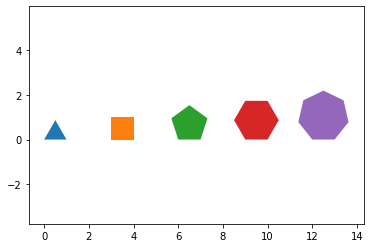

In [134]:
fig = plt.figure()
for i in range(0,5):
    wielokatli=(list(tuple(wierzcholek+Matrix([[3*i],[0]])) for wierzcholek in NkatForemny(i+3)));
    wielokatli.append(wielokatli[0]) #dla domknięcia dodajemy ostatni wierzchołek równy pierwszemu
    xli,yli=zip(*wielokatli)
    plt.axis('equal') #proporcjonalne osie
    #axis('off')
    plt.fill(xli,yli)
plt.show() #rysowanie skonfigurowanej ilustracji

Teraz jesteśmy już gotowi do wygenerowania naszego modelowego pięciokąta foremnego. Pamiętamy o dodaniu na końcu listy dodatkowego wierzchołka, który jest równy $P_0$. Jest to potrzebne dla prawidłowego rysowania wielokątów.

In [173]:
pieciokat0=NkatForemny(5)
pieciokat0.append(pieciokat0[0])
pieciokat=[Matrix([[list(y)[0].simplify()],[list(y)[1].simplify()]]) for y in pieciokat0] #upraszczamy formuły

W kodzie powyżej użyliśmy potężnej funkcjonalności 

`<wyrazenie>.simplify()`

która upraszcza w znany SymPy sposób wyrażenia symboliczne. Do uproszczeń stosuje się znane zależności między funkcjami oraz tożsamości. Efekt działania tej komendy zależy w istotny sposób od wyrażenia i jest zawsze taki sam dla tego samego wyrażenia.

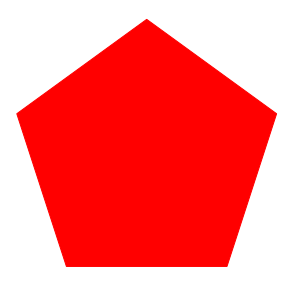

In [140]:
wielokatli=list(tuple(wierzcholek) for wierzcholek in NkatForemny(5));
wielokatli.append(wielokatli[0])
xli,yli=zip(*wielokatli)
fig=plt.figure(figsize=[5,5]) #wielkość figury w kierunku x i y
plt.axis('equal')
plt.axis('off') #wyłączenie wyświetlania osi
plt.fill(xli,yli,color='red')
plt.show()

Wielokąty możemy na siebie nakładać i kolorować. Poniższy przykład polega na obracaniu pięciokątów o zadany kąt i ustawianiu ich jeden na drugim, ze zmieniającym się kolorem. Kolor jest zadany jako `color=(R,G,B)`, gdzie parametry $R$, $G$, $B$ są liczbami rzeczywistymi w przedziale $0$ do $1$.

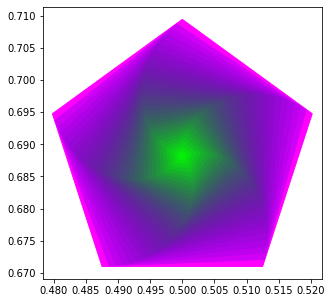

In [243]:
#wyznaczanie środka ciężkości
def sumM(li): 
    sum0=li[0]
    for el in li[1:]:
        sum0+=el
    return sum0*Rational(1,len(li))

#obrót wielokąta po przesunięcia środka ciężkości do (0,0) i przesunięcie go z powrotem + zastosowanie skali
def obrotSkalaWielokat(wiel,t,skala): #wiel[:-1]==wiel[0]
    s=sumM(wiel[:-1])
    rot=[obrot(t)*((el-s)*skala)+s for el in wiel[:-1]]
    return rot+[rot[0]]


#inicjalizacja figury
fig=plt.figure(figsize=[5,5]) #wielkość figury w kierunku x i y
plt.axis('equal')
#plt.axis('off') #wyłączenie wyświetlania osi

#trzydzieści iteracji rysowania pięciokąta
iteracje=30
for i in range(0,iteracje):
    wielokatli=obrotSkalaWielokat(pieciokat,2*i*pi/(5*iteracje),Rational(iteracje-i,40*iteracje))
    xli,yli=zip(*wielokatli)
    plt.fill(xli,yli,color=(1-(i/iteracje)**(1/2),(i/iteracje)**2,(iteracje-i)/iteracje))
plt.show()

Wracając do naszego głównego zadania, pozycjonujemy cztery pięciokącie na płaszczyźnie, aby stworzyły makietę ścian naszego pudełka. Ponieważ dno pudełka nie będzie nam potrzebne, więc je ignorujemy.

Pozycjonowanie odbywa się za pomocą obrotów o kąty $0,90,180$ i $270$ stopni, wraz z odpowiednimi przesunięciami o wektory na płaszczyźnie. Do szybkiego przetransformowania odpowiednich wektorów stosujemy komendę `map` wraz z argumentem, którym jest funkcja transformująca i lista (w tym przypadku `pieciokat`).

In [245]:
pi1=list(map(lambda x: x+Matrix([[0],[1]]),pieciokat))
pi2=list(map(lambda x: obrot(-pi/2)*x+Matrix([[1],[1]]),pieciokat))
pi3=list(map(lambda x: obrot(-pi)*x+Matrix([[1],[0]]),pieciokat))
pi4=list(map(lambda x: obrot(-3/2*pi)*x+Matrix([[0],[0]]),pieciokat))

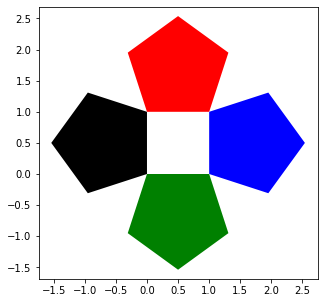

In [249]:
#definiujemy pomocniczą funkcję rysującą pojedynczy wielokąt
def polygon_draw(li,color):
    wielokatli=list(tuple(wierzcholek) for wierzcholek in li);
    wielokatli.append(wielokatli[0])
    xli,yli=zip(*wielokatli)
    plt.fill(xli,yli,color)

fig=plt.figure(figsize=[5,5])
plt.axis('equal')
polygon_draw(pi1,color='red')
polygon_draw(pi2,color='blue')
polygon_draw(pi3,color='green')
polygon_draw(pi4,color='black')
plt.show()

Teraz czeka nas trudniejsze zadanie. Musimy opracować wzory na obracanie naszych pięciokątów w trzech wymiarach, wokół krawędzi, która styka się z białym kwadratem. 

Nasze pięciokąty zyskają dodatkową, trzecią współrzędną, równą 0. Po obrocie ich współrzędne będą zazwyczaj niezerowe.

Obrót wokół osi $X$ odbywa się w ten sposób, że wektor $(x,y,z)$ zachowuje współrzędną $y$. Współrzędne $(x,z)$ obracamy za pomocą macierzy obrotu $\theta(t)$ o zadany kąt $t$.

In [258]:
x,y,z,t=symbols('x,y,z,t')
v=Matrix([[x],[y],[z]]) #wektor poddany transformacji
vtmp=obrot(t)*Matrix([v[0],v[2]]) #obrót tylko na 0 i 2 współrzędnej
vobr=Matrix([[vtmp[0]],[v[1]],[vtmp[1]]]) #złączenie ponowne w wektor 3D
vobr

Matrix([
[x*cos(t) - z*sin(t)],
[                  y],
[x*sin(t) + z*cos(t)]])

Bazując na powyższych kalkulacjach definiujemy zatem funkcję

In [256]:
def ObrotWX0(v,t):
    x,y,z=list(v)
    return Matrix([[x*cos(t) - z*sin(t), y, x*sin(t)+z*cos(t)]])

Podobnie wyznaczamy obrót wokół osi Y

In [257]:
def ObrotWY0(v,t):
    x,y,z=list(v)
    return Matrix([[x, y*cos(t) - z*sin(t), y*sin(t)+z*cos(t)]])

Teraz chcemy obrócić wokół osi zadanej równaniem $x=1$. W związku z tym, najpierw przesuwamy nasze punktu o $1$ jednostkę w lewo, obracamy, a następnie wracamy o jedną jednostkę w prawo. Tak uzyskana transformacja będzie obrotem o zadany kąt wokół osi przechodzącej przez $x=1$.

In [259]:
x,y,z,t=symbols('x,y,z,t')
v=Matrix([[x],[y],[z]]) #wektor poddany transformacji
vtmp=obrot(t)*Matrix([v[0]-1,v[2]]) #obrót tylko na 0 i 2 współrzędnej
vobr=Matrix([[vtmp[0]+1],[v[1]],[vtmp[1]]]) #złączenie ponowne w wektor 3D
vobr

Matrix([
[-z*sin(t) + (x - 1)*cos(t) + 1],
[                             y],
[     z*cos(t) + (x - 1)*sin(t)]])

Przedstawiamy rezultat w formie stosownej funkcji

In [260]:
def ObrotWX1(v,t):
    x,y,z=list(v)
    return Matrix([[-z*sin(t)+(x-1)*cos(t) +1 , y, z*cos(t) + (x-1)*sin(t)]])

Analogiczny rachunek pozwala nam skonstruować funkcję obrotu wokół osi zadanej równaniem $y=1$

In [261]:
def ObrotWY1(v,t):
    x,y,z=list(v)
    return Matrix([[x, 1 - cos(t) + y*cos(t)  - z*sin(t), z*cos(t)  - sin(t) + y*sin(t)]])

Teraz mając zadany wektor oraz kąt obrotu, możemy śledzić zmiany konkretnych wektorów pod wpływem obrotów. Przykładowo

In [262]:
t=Symbol('t')
ObrotWX0([1,1,0],t)

Matrix([[cos(t), 1, sin(t)]])

In [263]:
ObrotWY0([1,1,0],t)

Matrix([[1, cos(t), sin(t)]])

In [264]:
ObrotWX1([2,0,0],t)

Matrix([[cos(t) + 1, 0, sin(t)]])

In [265]:
ObrotWY1([0,2,0],t)

Matrix([[0, cos(t) + 1, sin(t)]])

Potrzebujemy teraz biblioteki do rysowania kształtów w 3D

In [266]:
from mpl_toolkits.mplot3d import Axes3D

Wyrysujmy w 3D trajektorie ruchu czterech wierzchołków pod wpływem obrotu o zadany kąt. Funkcja `arange` pozwala nam wybrać częstotliwość próbkowania liczb z zadanego przedziału.

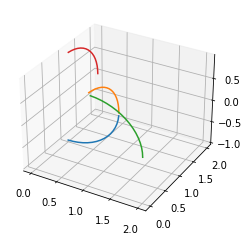

In [270]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x,y,z=list(ObrotWX0([1,1,0],t))
xli=list(map(lambda v:x.subs({t:v}),arange(-pi/2,0,0.1)))
yli=list(map(lambda v:y.subs({t:v}),arange(-pi/2,0,0.1)))
zli=list(map(lambda v:z.subs({t:v}),arange(-pi/2,0,0.1)))
ax.plot(xli, yli, zli)

x,y,z=list(ObrotWY0([1,1,0],t))
xli=list(map(lambda v:x.subs({t:v}),arange(0,pi/2,0.1)))
yli=list(map(lambda v:y.subs({t:v}),arange(0,pi/2,0.1)))
zli=list(map(lambda v:z.subs({t:v}),arange(0,pi/2,0.1)))
ax.plot(xli, yli, zli)

x,y,z=list(ObrotWX1([2,0,0],t))
xli=list(map(lambda v:x.subs({t:v}),arange(0,pi/2,0.1)))
yli=list(map(lambda v:y.subs({t:v}),arange(0,pi/2,0.1)))
zli=list(map(lambda v:z.subs({t:v}),arange(0,pi/2,0.1)))
ax.plot(xli, yli, zli)

x,y,z=list(ObrotWY1([0,2,0],t))
xli=list(map(lambda v:x.subs({t:v}),arange(0,pi/2,0.1)))
yli=list(map(lambda v:y.subs({t:v}),arange(0,pi/2,0.1)))
zli=list(map(lambda v:z.subs({t:v}),arange(0,pi/2,0.1)))
ax.plot(xli, yli, zli)

plt.show()

Wprowadźmy teraz cztery pięciokąty jako trójwymiarowe figury. Będziemy na nich wykonywać operacje obrotu (na ich wierzchołkach), wokół wybranych wcześniej osi.

In [272]:
pi1_3d=list(map(lambda x: Matrix(list(x)+[0]),pi1))
pi2_3d=list(map(lambda x: Matrix(list(x)+[0]),pi2))
pi3_3d=list(map(lambda x: Matrix(list(x)+[0]),pi3))
pi4_3d=list(map(lambda x: Matrix(list(x)+[0]),pi4))

Funkcjonalność SymPy pozwala nam obrócić dany pięciokąt o abstrakcyjny kąt $t$.

In [315]:
t=symbols('t')
pol1_3d=list(map(lambda x: ObrotWY1(x,t),pi1_3d)) #obrót przeciwny do ruchu wskazówek zegara
pol2_3d=list(map(lambda x: ObrotWX1(x,t),pi2_3d)) #obrót przeciwny do ruchu wskazówek zegara
pol3_3d=list(map(lambda x: ObrotWY0(x,-t),pi3_3d)) #obrót zgodny z ruchem wskazówek zegara
pol4_3d=list(map(lambda x: ObrotWX0(x,-t),pi4_3d)) #obrót zgodny z ruchem wskazówek zegara

Efekt takiej operacji jest skomplikowanym wyrażeniem wierzchołków jako funkcji zależnych od $t$.

Uwaga: rezygnujemy z wektorów kolumnowych, od teraz będziemy posługiwać się tylko wektorami wierszowymi

In [277]:
pol1_3d

[Matrix([[1, 1, 0]]),
 Matrix([[sqrt(5)/4 + 3/4, -cos(t) + (sqrt(2*sqrt(5) + 10)/4 + 1)*cos(t) + 1, -sin(t) + (sqrt(2*sqrt(5) + 10)/4 + 1)*sin(t)]]),
 Matrix([[1/2, -cos(t) + (1 + (sqrt(2) + sqrt(10))*sqrt(sqrt(5) + 5)/8)*cos(t) + 1, -sin(t) + (1 + (sqrt(2) + sqrt(10))*sqrt(sqrt(5) + 5)/8)*sin(t)]]),
 Matrix([[1/4 - sqrt(5)/4, -cos(t) + (sqrt(2*sqrt(5) + 10)/4 + 1)*cos(t) + 1, -sin(t) + (sqrt(2*sqrt(5) + 10)/4 + 1)*sin(t)]]),
 Matrix([[0, 1, 0]]),
 Matrix([[1, 1, 0]])]

Wreszcie jesteśmy gotowi rozwiązać nasze zadanie. Mając dane dwa sąsiednie pięciokąty pod wpływem obrotu, czekamy na moment, gdy parametr $t$ spełnia warunek, że drugi wierzchołek pierwszego pięciokąta pokryje się z czwartym wierzchołkiem drugiego pięciokąta. Wtedy nasze pudełko domyka się.

Chcemy zatem, aby następujące trzy wyrażenia przyjęły wartość $0$.

In [289]:
#boki zetkną się, gdy wyrażenia poniżej zerują się
wyrazenia=list(pol1_3d[1]-pol2_3d[3])
eq1=Eq(wyrazenia[0],0) #komenda Eq służy do formowania równań
eq2=Eq(wyrazenia[1],0)
eq3=Eq(wyrazenia[2],0)

In [290]:
eq1

Eq(-sqrt(2*sqrt(5) + 10)*cos(t)/4 - 1/4 + sqrt(5)/4, 0)

In [291]:
eq2

Eq(-cos(t) + (sqrt(2*sqrt(5) + 10)/4 + 1)*cos(t) - sqrt(5)/4 + 1/4, 0)

In [292]:
eq3

Eq(-sin(t) - sqrt(2*sqrt(5) + 10)*sin(t)/4 + (sqrt(2*sqrt(5) + 10)/4 + 1)*sin(t), 0)

# Upraszczanie wyrażeń

Nasze równania $eq_1,eq_2,eq_3$ możemy uprościć stosując komendę `.simplify()`. Zauważymy, że dwa pierwsze równania są równoważne. Trzecie upraszcza się do postaci $0=0$.

In [296]:
eq1.simplify()

Eq(sqrt(2*sqrt(5) + 10)*cos(t)/4 - sqrt(5)/4 + 1/4, 0)

In [297]:
eq2.simplify()

Eq(sqrt(2*sqrt(5) + 10)*cos(t)/4 - sqrt(5)/4 + 1/4, 0)

In [299]:
(eq1.simplify())==(eq2.simplify())

True

In [300]:
eq3.simplify()

True

Pozostaje nam zatem wyznaczyć wartość kąta $t$ z wykorzystaniem równania $1$. Do tego wykorzystamy funkcję `solve`, która równanie symboliczne rozwiązuje ze względu na wskazane zmienne. Zachowanie tej komendy będzie zależało w istotny sposób od wybranego równania.

In [303]:
#rozwiązujemy równanie ze względu na t (rozwiązanie dokładne)
solv=solve(eq1,t)

Obiekt rozwiązania `solv` przechowuje listę wszystkich rozwiązań. Są dokłądnie 2 - jedno odpowiadające obrotowi naszych ścian w górę, drugie obrotowi w dół. Zauważmy, że rozwiązania są wyrażone symbolicznie za pomocą funkcji arcus cosinus.

In [304]:
len(solv)==2

True

In [305]:
solv[0]

-acos((-sqrt(2) + sqrt(10))/(2*sqrt(sqrt(5) + 5))) + 2*pi

In [306]:
solv[1]

acos((-sqrt(2) + sqrt(10))/(2*sqrt(sqrt(5) + 5)))

Gdy interesuje nas wartość numeryczna tych kątów wyrażona w stopniach, możemy posłużyć się przybliżeniem.

In [307]:
(solv[0]*180/pi).n()

288.960709881923

In [308]:
(solv[1]*180/pi).n()

71.0392901180775

Naszym "magicznym" kątem będzie wybór podyktowany obrotem w górę.

In [309]:
magiczny_kat=solv[1]

Teraz zobaczmy, że faktycznie znaleziony przez nas kąt odpowiada prawidłowemu złożeniu pudełka.

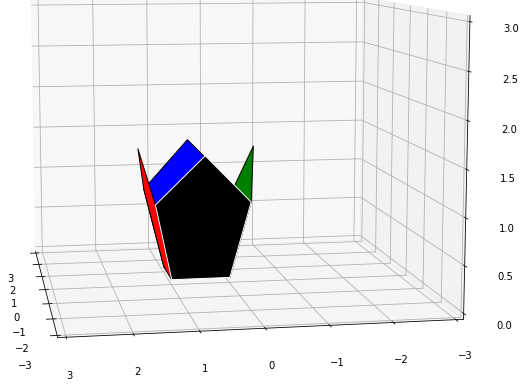

In [314]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
def VertFloat(li):
    xl,yl,zl=zip(*li)
    xl=[float(x) for x in xl]
    yl=[float(x) for x in yl]
    zl=[float(x) for x in zl]
    return [list(zip(xl,yl,zl))]
fig = plt.figure()
ax = Axes3D(fig)

#zakres
ax.set_xlim3d(-3,3)
ax.set_ylim3d(-3,3)
ax.set_zlim3d(0,3)

#ustawienia kamery
ax.dist=5
ax.elev=8
ax.azim=170

#wierzchołki wielokątów
tt=magiczny_kat
pol1_3d_float=[VertFloat(list(map(lambda x: ObrotWY1(x,tt),pi1_3d))),['red','black']]
pol2_3d_float=[VertFloat(list(map(lambda x: ObrotWX1(x,tt),pi2_3d))),['blue','black']]
pol3_3d_float=[VertFloat(list(map(lambda x: ObrotWY0(x,-tt),pi3_3d))),['green','black']]
pol4_3d_float=[VertFloat(list(map(lambda x: ObrotWX0(x,-tt),pi4_3d))),['black','white']]
#print(verts)

#dodawanie figur
for verts in [pol1_3d_float,pol2_3d_float,pol3_3d_float,pol4_3d_float]:
    ax.add_collection3d(Poly3DCollection(verts[0],facecolor =verts[1][0],edgecolor=verts[1][1]))
plt.show()

# Obliczamy odległość wierzchołków

Pozostaje nam zatem ostatnie zadanie. Obliczymy odległość naprzeciwległych wierzchołków. Wybieramy je jako trzeci wierzchołek pierwszego pięciokąta i trzeci wierzchołek trzeciego pięciokąta.

In [316]:
wierzcholek1=pol1_3d[2]
wierzcholek2=pol3_3d[2]

Odległość wierzchołków od siebie to długość wektora ich różnicy

In [318]:
roznica=wierzcholek1-wierzcholek2

Współrzędne pierwsza i trzecia wektora roznica zerują się. Jedno zerowanie wynika automatycznie, drugie uzyskujemy po zastosowaniu metody `simplify()`

In [319]:
roznica[0]

0

In [322]:
roznica[1].simplify()

sqrt(2*sqrt(5) + 10)*cos(t)/4 + sqrt(10*sqrt(5) + 50)*cos(t)/4 + 1

In [323]:
roznica[2].simplify()

0

In [64]:
(wierzcholek1-wierzcholek2)[1].factor()

(sqrt(2)*sqrt(sqrt(5) + 5)*cos(t) + sqrt(10)*sqrt(sqrt(5) + 5)*cos(t) + 4)/4

In [65]:
(wierzcholek1-wierzcholek2)[2].factor()

0

Zatem odległość między wierzchołkami wynosi ostatecznie `abs(roznica[1])`. Obliczmy wprost to wyrażenie dla naszego kąta styku obliczonego wcześniej.

In [324]:
(roznica)[1].subs({t:magiczny_kat}).expand()

2

Zatem udowodniliśmy matematycznie, że odległość między wybranymi wierzchołkami wynosi dokładnie 2. Wykorzystana przez nas biblioteka obliczeń symbolicznych SymPy pozwala nam na tę absolutną konluzję.

### Inny sposób obliczenia odległosci

W naszych obliczeniach wyliczenie kąta $t$ dla styku nie było tak istotne. Kluczowe było, że obliczyliśmy wartość funkcji $cos(t)$ dla tego kąta. To pozwala nam inaczej podejść do poprzednich rachunków i wyrugować z użycia funkcji solve odwracanie funkcji cosinus.

In [345]:
sol=(roznica).subs({cos(t):solve(eq1,cos(t))[0]})
sol.simplify()
sol

Matrix([[0, 2, 0]])

Na koniec obejrzyjmy jeszcze raz całą sytuację z wybranego kąta. Korzystamy w naszej funkcji rysującej dodatkowo z interaktywnych widżetów zawartych w bibliotece `ipywidgets`

In [350]:
from ipywidgets import interactive
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def VertFloat(li):
    xl,yl,zl=zip(*li)
    xl=[float(x) for x in xl]
    yl=[float(x) for x in yl]
    zl=[float(x) for x in zl]
    return [list(zip(xl,yl,zl))]
def f(tt,dist,elev,azim):
    fig = plt.figure(figsize=[3,3])
    ax = Axes3D(fig)

    #zakres
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(-3,3)
    ax.set_zlim3d(0,3)

    #ustawienia kamery
    ax.dist=dist
    ax.elev=elev
    ax.azim=azim

    #wierzchołki wielokątów

    pol1_3d=[VertFloat(list(map(lambda x: ObrotWY1(x,tt),pi1_3d))),['red','black']]
    pol2_3d=[VertFloat(list(map(lambda x: ObrotWX1(x,tt),pi2_3d))),['blue','black']]
    pol3_3d=[VertFloat(list(map(lambda x: ObrotWY0(x,-tt),pi3_3d))),['green','black']]
    pol4_3d=[VertFloat(list(map(lambda x: ObrotWX0(x,-tt),pi4_3d))),['black','white']]

    #dodawanie figur
    for verts in [pol1_3d,pol2_3d,pol3_3d,pol4_3d]:
        ax.add_collection3d(Poly3DCollection(verts[0],facecolor =verts[1][0],edgecolor=verts[1][1]))
    w1=[float(x) for x in ObrotWY1(pi1_3d[2],tt)]
    w2=[float(x) for x in ObrotWY0(pi3_3d[2],-tt)]  
    ax.add_collection3d(Line3DCollection([[w1,w2]], colors='black',linewidth=3,linestyle='dashed'))
    plt.show()

interactive_plot = interactive(f, tt=(0, float(magiczny_kat),0.01),dist=(0,10,0.1),elev=(0,10,0.1),azim=(0,360,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.61, description='tt', max=1.2398695108399236, step=0.01), FloatSlide…